In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns

## Načitanie dát

In [ ]:
dataset = pd.read_csv('../Data/final_dataset_2_balanced.csv')

## Dataset


In [ ]:
dataset.shape

(1198, 2)

In [ ]:
dataset.head()

,author_id,processed_text
0,168,frank disappointed easy think earning one 's l...
1,168,indulging uncomfortable reflections suddenly l...
2,168,suit said mr strathmore emphatically evidently...
3,168,mrs mason mark took handsome flat town hencefo...
4,168,one word close term imprisonment peg came mrs ...


In [ ]:
print((dataset['processed_text']).isnull().sum())

0


In [ ]:
print((dataset['author_id']).isnull().sum())

0


In [ ]:
dataset['word_count'] = dataset['processed_text'].apply(lambda x: len(x.split()))
dataset['char_count'] = dataset['processed_text'].apply(lambda x: len(x.replace(" ", "")))

average_word_count = dataset['word_count'].mean()
average_char_count = dataset['char_count'].mean()

print(f"Priemerný počet slov: {average_word_count}")
print(f"Priemerný počet znakov (bez medzier): {average_char_count}")

Priemerný počet slov: 6160.128547579299
Priemerný počet znakov (bez medzier): 36431.26627712855


In [ ]:
all_words_set = set()

for text in dataset['processed_text']:
    all_words_set.update(text.split())

total_unique_words = len(all_words_set)

print(f"Celkový počet unikátnych slov v datasete: {total_unique_words}")

Celkový počet unikátnych slov v datasete: 119219


In [ ]:
x = 5000
long_texts = dataset['processed_text'].apply(lambda text: len(text.split()) > x)

num_long_texts = long_texts.sum()

print(f"Počet vstupov s viac ako {x} slovami je: {num_long_texts}")

Počet vstupov s viac ako 5000 slovami je: 752


In [ ]:
author_counts = dataset['author_id'].value_counts()
print(author_counts)

author_id
28      62
367     61
1057    61
1032    61
8659    61
3840    61
761     61
333     60
1626    60
3141    60
97      60
168     60
1285    59
1181    59
213     59
1583    59
1800    59
113     59
1865    58
127     58
Name: count, dtype: int64


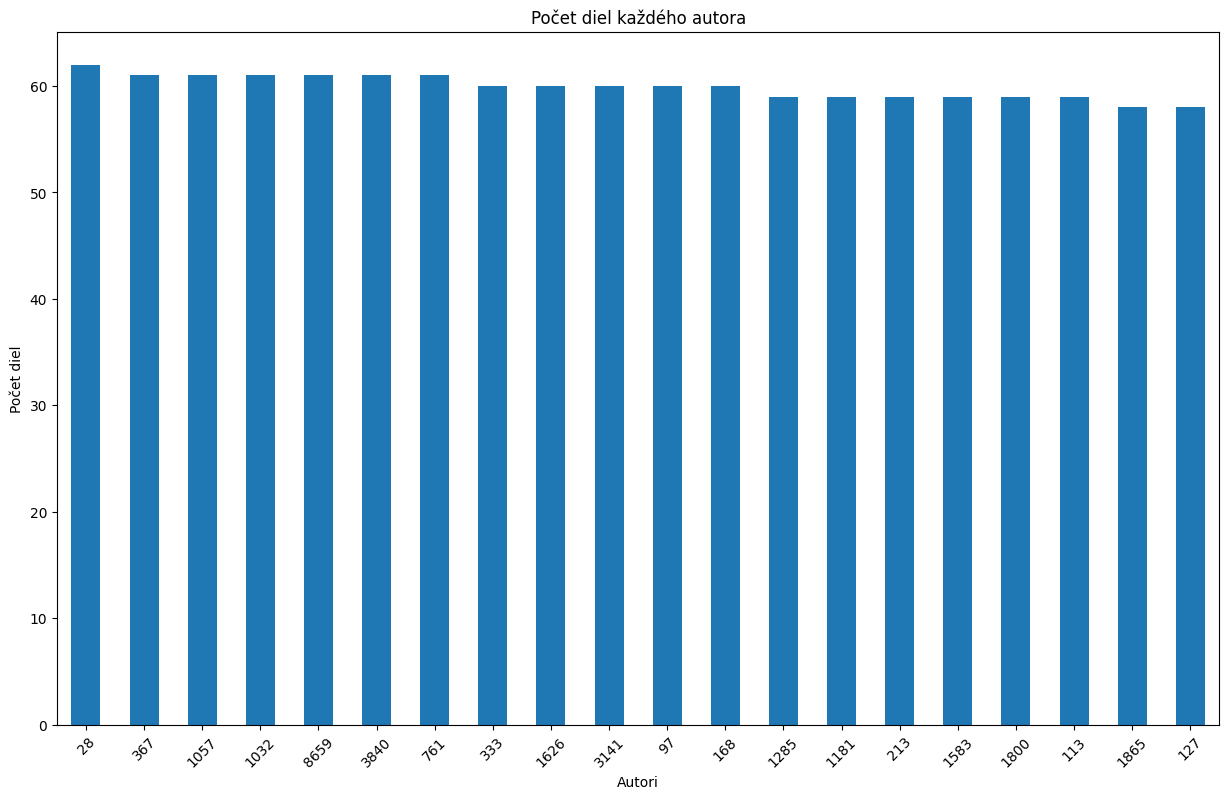

In [ ]:
plt.figure(figsize=(15, 9))
author_counts.plot(kind='bar')
plt.title('Počet diel každého autora')
plt.xlabel('Autori')
plt.ylabel('Počet diel')
plt.xticks(rotation=45)
plt.show()